In [2]:
# Support Vector Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Importing the dataset

data = pd.read_csv('Advertising.csv')

In [4]:
data.shape

(200, 5)

In [5]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
data.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


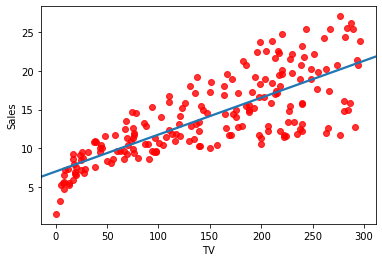

In [8]:
sns.regplot(data.TV, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

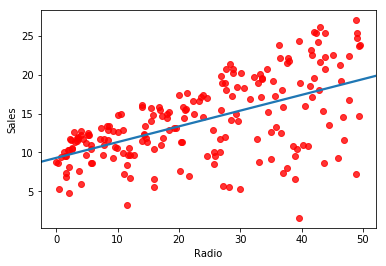

In [0]:
sns.regplot(data.Radio, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

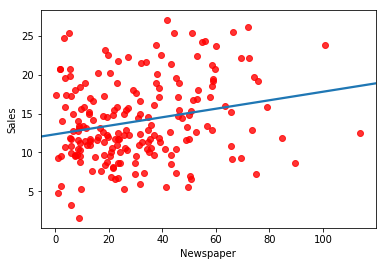

In [0]:
sns.regplot(data.Newspaper, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

# Multiple Linear Regression

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [11]:
regr = LinearRegression()

X = data[['TV']]
y = data[['Sales']]

In [12]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
Sales_pred = regr.predict(X)

In [14]:
print("The R2 score for UVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for UVLR is 0.611875


In [15]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [16]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Sales_pred = regr.predict(X)

In [18]:
print("The R2 score for MVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for MVLR is 0.897211


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [20]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Sales_pred = regr.predict(X_test)

In [22]:
print("The R2 score for MVLR is %f" % (r2_score(y_test, Sales_pred))) 

The R2 score for MVLR is 0.921183


# SVR

In [23]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X,y)

D:\Programs\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# Predicting a new result with the Support Vector Regression 
y_Pred = regressor.predict(X)

In [25]:
print("The R2 score for SVR is %f" % (r2_score(y, regressor.predict(X)))) 

The R2 score for SVR is 0.891620


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [27]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

D:\Programs\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
y_Pred = regressor.predict(X_test)

In [29]:
print("The R2 score for SVR is %f" % (r2_score(y_test, regressor.predict(X_test)))) 

The R2 score for SVR is 0.861865
